# Испит по Роботика 1

Датум: 25.06.2021

## Задача 3

**(25 поени)** Дадена е подвижната роботска рака од типот RRRR, која е опишана со следната трансформациска матрица:

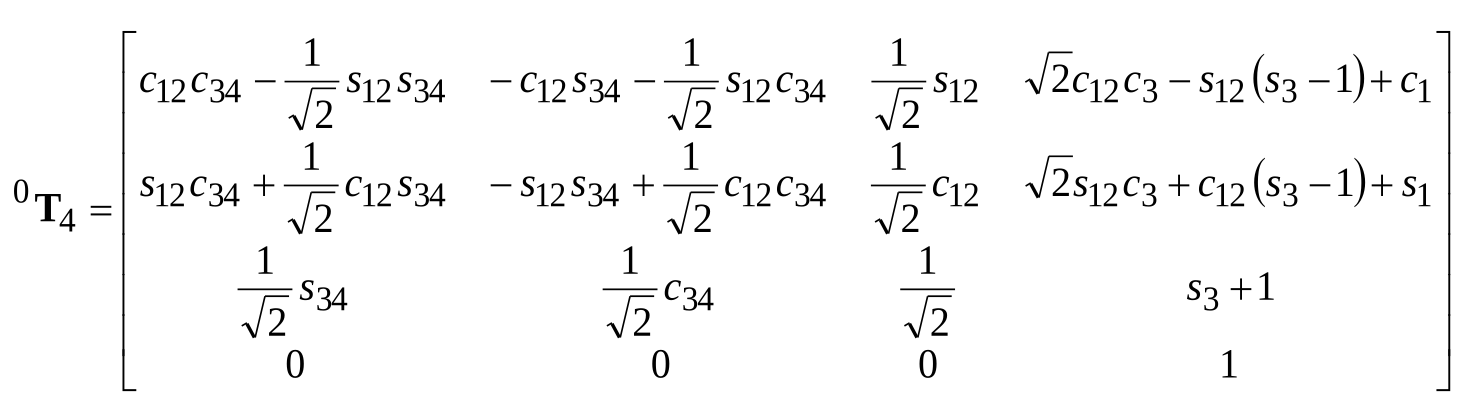

In [3]:
from IPython import display
display.Image('images/2.png', width=720)

и Јакобијанот:

$$ {}^0\bf{J}_\omega = \begin{bmatrix}
0 & 0 & \frac{1}{\sqrt 2} & \frac{1}{\sqrt 2} \\
0 & 0 & 0 & 0 \\
1 & 1 & \frac{1}{\sqrt 2} & \frac{1}{\sqrt 2}
\end{bmatrix} $$

кој ја одредува врската помеѓу ротационата брзина на извршниот елемент и брзините на зглобовите на дадената роботска рака.

а) Да се определи Јакобијанот кој ја дефинира врската помеѓу линеарната брзина на извршниот елемент од раката и брзината на зглобовите на раката за
$$ \begin{bmatrix} \theta_1 & \theta_2 & \theta_3 & \theta_4 \end{bmatrix}^\top = \begin{bmatrix} 0 & 90° & -90° & 0 \end{bmatrix}^\top $$.

б) Да се определи општиот Јакобијан за дадената роботска рака во однос на референтниот координатен систем, кој ја дефинира врската помеѓу линеарната и ротационата брзина на извршниот елемент од раката и брзината на зглобовите на раката за дадените вредности на променливите на зглобовите под а).

в) Да се определат вртливите моменти во зглобовите на роботската рака, ако врз координатниот почеток од координатниот систем $\{4\}$ , придружен со извршниот елемент од раката, дејствува следниот вектор на сили: ${}^4 F = \begin{bmatrix} 0 & 6 & 0 & 7 & 0 & 8 \end{bmatrix}^\top$.

## Решение

In [11]:
import sympy as sp
import script as rt
from IPython import display
from sympy.physics import mechanics
from IPython import display
from IPython.lib.display import IFrame
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sympy.physics import mechanics

In [12]:
theta1, theta2, theta3, theta4 = sp.symbols('theta1, theta2, theta3, theta4')

In [7]:
x = sp.sqrt(2)*sp.cos(theta1+theta2)*sp.cos(theta3)-sp.sin(theta1+theta2)*(sp.sin(theta3)-1)+sp.cos(theta1)
x

-(sin(theta3) - 1)*sin(theta1 + theta2) + cos(theta1) + sqrt(2)*cos(theta3)*cos(theta1 + theta2)

In [8]:
y=sp.sqrt(2)*sp.cos(theta1+theta2)*sp.cos(theta3)+sp.cos(theta1+theta2)*(sp.sin(theta3)-1)+sp.sin(theta1)
y

(sin(theta3) - 1)*cos(theta1 + theta2) + sin(theta1) + sqrt(2)*cos(theta3)*cos(theta1 + theta2)

In [9]:
z= sp.sin(theta3)+1
z

sin(theta3) + 1

In [13]:
xdiff = [x.diff(theta1), x.diff(theta2), x.diff(theta3),x.diff(theta4)]
xdiff

[-(sin(theta3) - 1)*cos(theta1 + theta2) - sin(theta1) - sqrt(2)*sin(theta1 + theta2)*cos(theta3),
 -(sin(theta3) - 1)*cos(theta1 + theta2) - sqrt(2)*sin(theta1 + theta2)*cos(theta3),
 -sqrt(2)*sin(theta3)*cos(theta1 + theta2) - sin(theta1 + theta2)*cos(theta3),
 0]

In [14]:
J = sp.Matrix([[x.diff(theta1), x.diff(theta2), x.diff(theta3),x.diff(theta4)],
              [y.diff(theta1), y.diff(theta2), y.diff(theta3),y.diff(theta4)],
              [z.diff(theta1), z.diff(theta2), z.diff(theta3),z.diff(theta4)]])
J

Matrix([
[-(sin(theta3) - 1)*cos(theta1 + theta2) - sin(theta1) - sqrt(2)*sin(theta1 + theta2)*cos(theta3), -(sin(theta3) - 1)*cos(theta1 + theta2) - sqrt(2)*sin(theta1 + theta2)*cos(theta3), -sqrt(2)*sin(theta3)*cos(theta1 + theta2) - sin(theta1 + theta2)*cos(theta3), 0],
[-(sin(theta3) - 1)*sin(theta1 + theta2) - sqrt(2)*sin(theta1 + theta2)*cos(theta3) + cos(theta1), -(sin(theta3) - 1)*sin(theta1 + theta2) - sqrt(2)*sin(theta1 + theta2)*cos(theta3), -sqrt(2)*sin(theta3)*cos(theta1 + theta2) + cos(theta3)*cos(theta1 + theta2), 0],
[                                                                                               0,                                                                                  0,                                                                  cos(theta3), 0]])

In [15]:
Jn =J.subs(theta1,0).subs(theta2, sp.pi/2).subs(theta3,-sp.pi/2).subs(theta4,0)
Jn

Matrix([
[0, 0, 0, 0],
[3, 2, 0, 0],
[0, 0, 0, 0]])

In [17]:
Jw= sp.Matrix([[0,0,1/sp.sqrt(2),1/sp.sqrt(2)],
               [0,0,0,0],
               [1,1,1/sp.sqrt(2),1/sp.sqrt(2)]])
Jw

Matrix([
[0, 0, sqrt(2)/2, sqrt(2)/2],
[0, 0,         0,         0],
[1, 1, sqrt(2)/2, sqrt(2)/2]])

In [18]:
J= sp.Matrix([Jn, Jw])
J

Matrix([
[0, 0,         0,         0],
[3, 2,         0,         0],
[0, 0,         0,         0],
[0, 0, sqrt(2)/2, sqrt(2)/2],
[0, 0,         0,         0],
[1, 1, sqrt(2)/2, sqrt(2)/2]])

In [19]:
F = sp.Matrix([0,6,0,7,0,8])
F

Matrix([
[0],
[6],
[0],
[7],
[0],
[8]])

In [20]:
T= J.T*F
T

Matrix([
[          26],
[          20],
[15*sqrt(2)/2],
[15*sqrt(2)/2]])